In [1]:
import tensorflow as tf
from tensorflow import keras
import keras

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_dir = './dataset/Training'
test_data_dir = './dataset/Testing'

IMG_SIZE = (128, 128)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  
)


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  
)


Found 6138 images belonging to 4 classes.
Found 1408 images belonging to 4 classes.


In [9]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [10]:
train_generator.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [11]:
class_names_test = list(test_generator.class_indices.keys())
print(class_names_test)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [12]:
import matplotlib.pyplot as plt

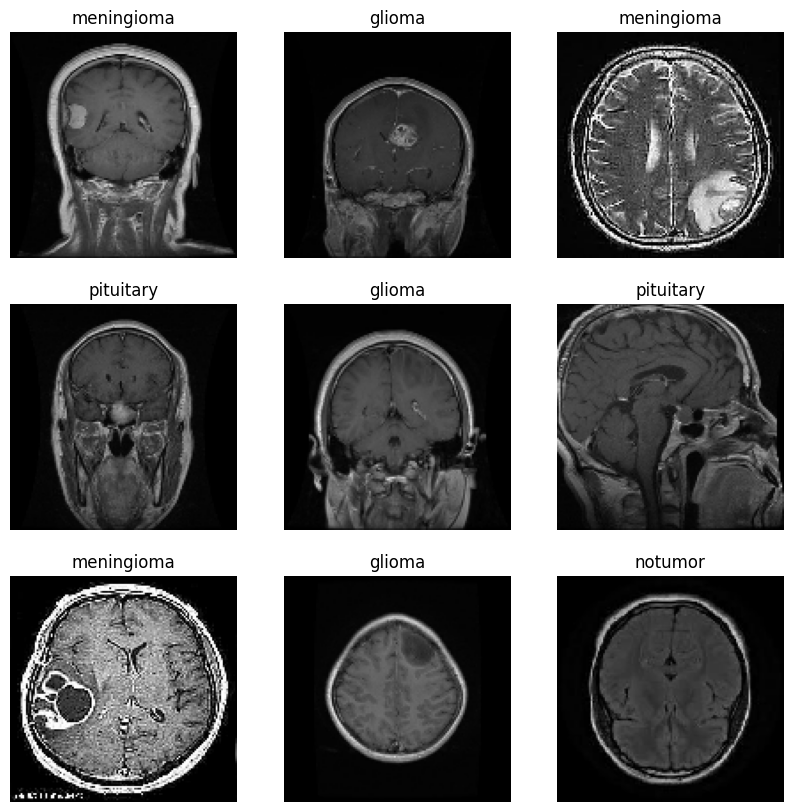

In [13]:
no_augmentation_images, no_augmentation_labels = next(test_generator)
plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(no_augmentation_images[i])
    class_index = tf.argmax(no_augmentation_labels[i])
    plt.title(class_names[class_index])
    plt.axis("off")
plt.show()

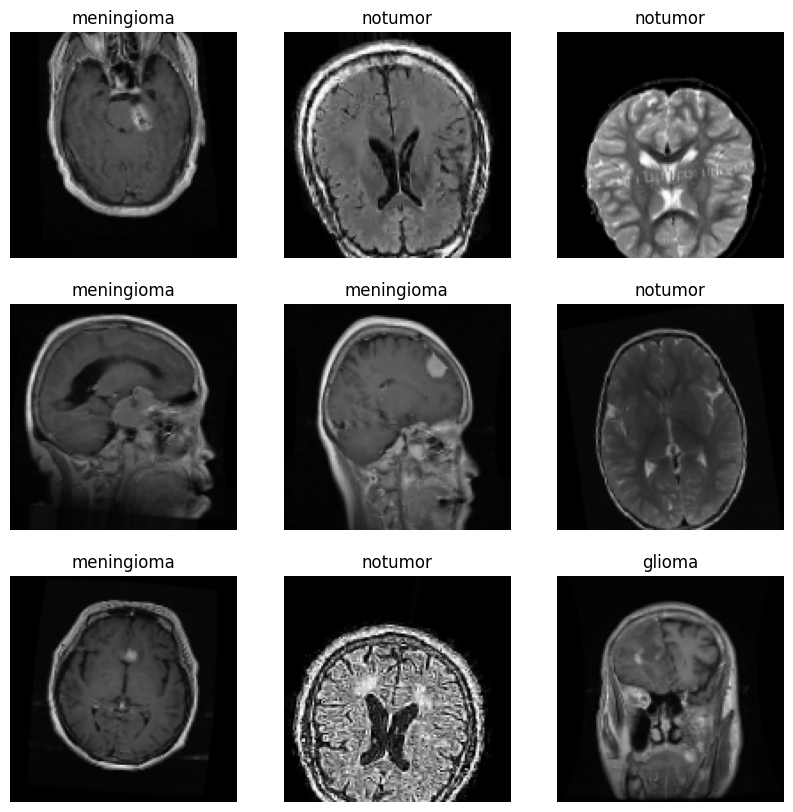

In [14]:


class_names = list(train_generator.class_indices.keys())


images, labels = next(train_generator)


plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(images[i])
    

    class_index = tf.argmax(labels[i])
    
    plt.title(class_names[class_index])
    plt.axis("off")

plt.show()


In [16]:
num_classes = len(class_names)
print(num_classes)

4


In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

# Add Dropout layer
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [18]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [14]:
history = model.fit(train_generator, epochs=25, validation_data=test_generator)

Epoch 1/25
192/192 [==============================] - 87s 449ms/step - loss: 0.9355 - accuracy: 0.5771 - val_loss: 0.6315 - val_accuracy: 0.7266
Epoch 2/25
192/192 [==============================] - 79s 413ms/step - loss: 0.6037 - accuracy: 0.7441 - val_loss: 0.7799 - val_accuracy: 0.7095
Epoch 3/25
192/192 [==============================] - 80s 414ms/step - loss: 0.5494 - accuracy: 0.7774 - val_loss: 0.6718 - val_accuracy: 0.7422
Epoch 4/25
192/192 [==============================] - 79s 411ms/step - loss: 0.4802 - accuracy: 0.8092 - val_loss: 0.5804 - val_accuracy: 0.7777
Epoch 5/25
192/192 [==============================] - 88s 459ms/step - loss: 0.4445 - accuracy: 0.8217 - val_loss: 0.5439 - val_accuracy: 0.7976
Epoch 6/25
192/192 [==============================] - 89s 465ms/step - loss: 0.3977 - accuracy: 0.8427 - val_loss: 0.4608 - val_accuracy: 0.8196
Epoch 7/25
192/192 [==============================] - 90s 468ms/step - loss: 0.3663 - accuracy: 0.8559 - val_loss: 0.4088 - val_ac

In [16]:
model.save("bwd2.keras")

In [1]:
from keras.models import load_model

model1 =  load_model("./bwd2.keras")

In [6]:
loss,acc = model1.evaluate(test_generator)
print("Accuracy on Test Data:",acc*100,"%")

loss,acc = model1.evaluate(train_generator)
print("Accuracy on Train Data:",acc*100,"%")


44/44 [==============================] - 7s 153ms/step - loss: 0.1785 - accuracy: 0.9382
Accuracy on Test Data: 93.82102489471436 %
192/192 [==============================] - 54s 278ms/step - loss: 0.1085 - accuracy: 0.9627
Accuracy on Train Data: 96.26914262771606 %


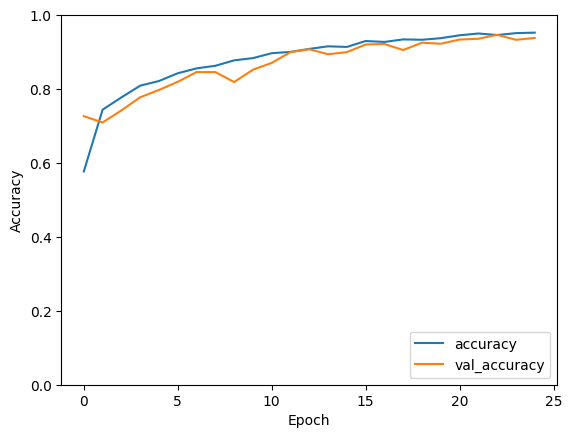

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


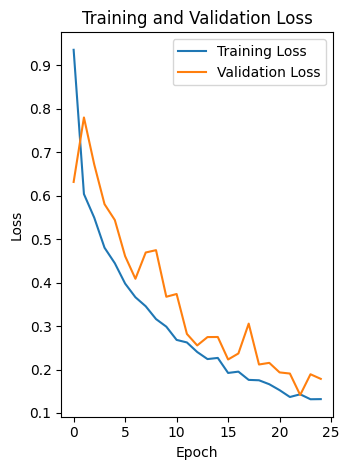

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_image_class(model, class_names, img_path, target_size=(128, 128)):
    
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  

    
    predictions = model.predict(img_array)
    
    predicted_class_index = np.argmax(predictions)

    
    predicted_class_name = class_names[predicted_class_index]

    
    predicted_probability = predictions[0][predicted_class_index]

    return predicted_class_name, predicted_probability


img_path = './dataset/Testing/meningioma/Te-me_0130.jpg'
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

predicted_class, predicted_prob = predict_image_class(model1, class_names, img_path)

print(f'The model predicts that the image belongs to class: {predicted_class}')
print(f'The predicted probability for the predicted class is: {predicted_prob:.4f}')


1/1 [==============================] - 0s 207ms/step
The model predicts that the image belongs to class: meningioma
The predicted probability for the predicted class is: 0.8034
